<a href="https://colab.research.google.com/github/Voztok94/Diabetes-Dataset/blob/main/Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
%matplotlib inline

In [24]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [26]:
diabetes = load_diabetes()  #  Load the diabetes dataset

In [27]:
print(diabetes.DESCR)  #  Print database description

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [28]:
print(diabetes.data.shape)
print(diabetes.target.shape)
print(diabetes.feature_names)

(442, 10)
(442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [29]:
pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', 9)  # Use the full option name 'display.max_columns'
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Convert results to float

In [30]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

In [31]:
#  Display Dataframe head and description
diabetes_df.head()

,age,sex,bmi,bp,...,s4,s5,s6,target
0,0.04,0.05,0.06,0.02,...,-0.00,0.02,-0.02,151.00
1,-0.00,-0.04,-0.05,-0.03,...,-0.04,-0.07,-0.09,75.00
2,0.09,0.05,0.04,-0.01,...,-0.00,0.00,-0.03,141.00
3,-0.09,-0.04,-0.01,-0.04,...,0.03,0.02,-0.01,206.00
4,0.01,-0.04,-0.04,0.02,...,-0.00,-0.03,-0.05,135.00


In [32]:
diabetes_df.describe()

,age,sex,bmi,bp,...,s4,s5,s6,target
count,442.00,442.00,442.00,442.00,...,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,-0.00,...,-0.00,0.00,0.00,152.13
std,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,77.09
min,-0.11,-0.04,-0.09,-0.11,...,-0.08,-0.13,-0.14,25.00
25%,-0.04,-0.04,-0.03,-0.04,...,-0.04,-0.03,-0.03,87.00
50%,0.01,-0.04,-0.01,-0.01,...,-0.00,-0.00,-0.00,140.50
75%,0.04,0.05,0.03,0.04,...,0.03,0.03,0.03,211.50
max,0.11,0.05,0.17,0.13,...,0.19,0.13,0.14,346.00


In [33]:
sample_df = diabetes_df.sample(frac=0.1, random_state=17)  #  Displays 10% of the samples

In [34]:
#  Seaborn plot settings
sns.set(font_scale=2)  #  Font size
sns.set_style('whitegrid')

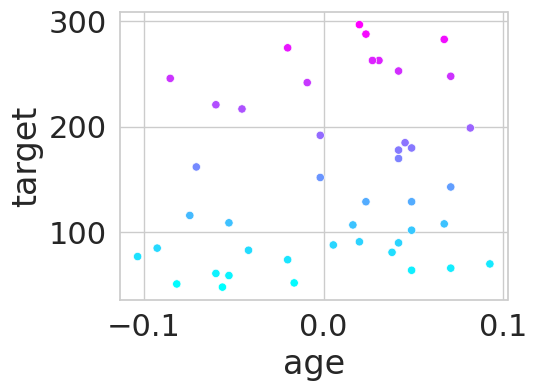

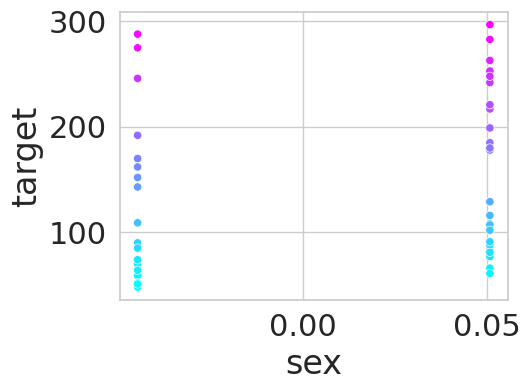

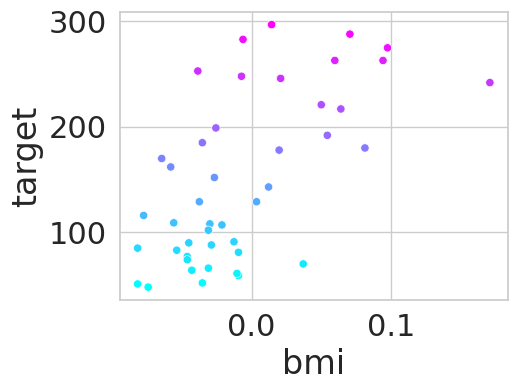

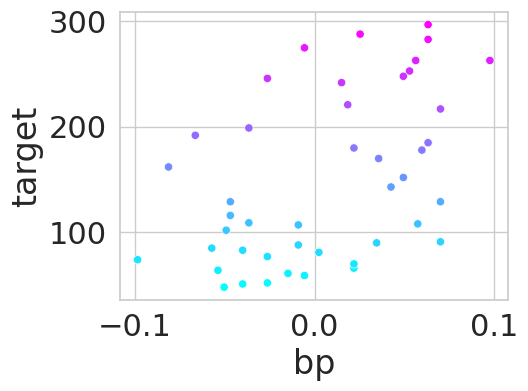

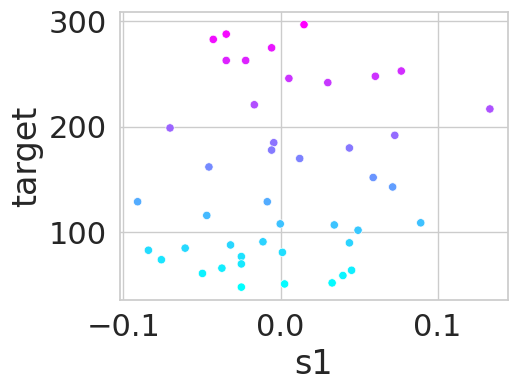

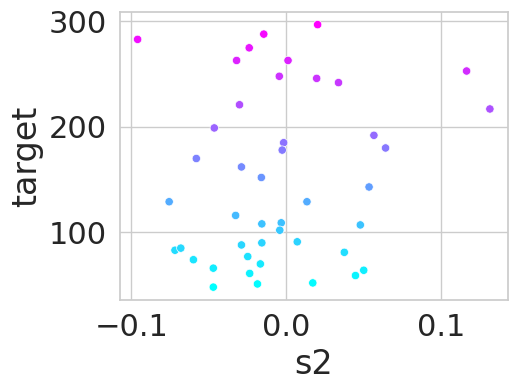

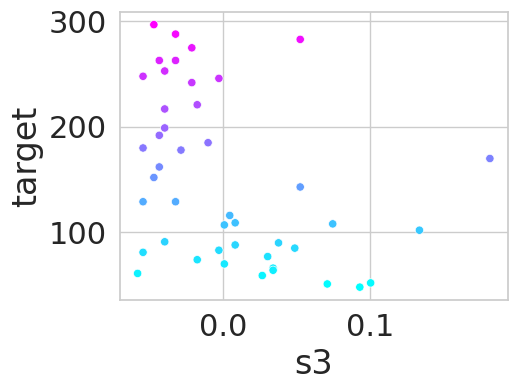

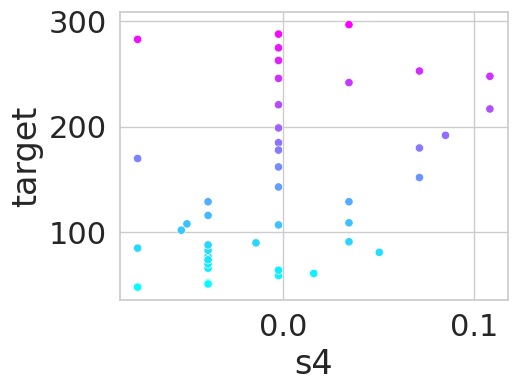

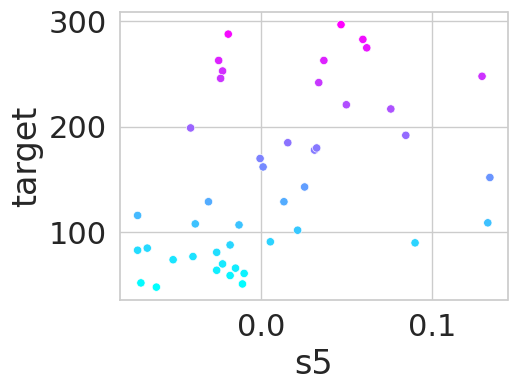

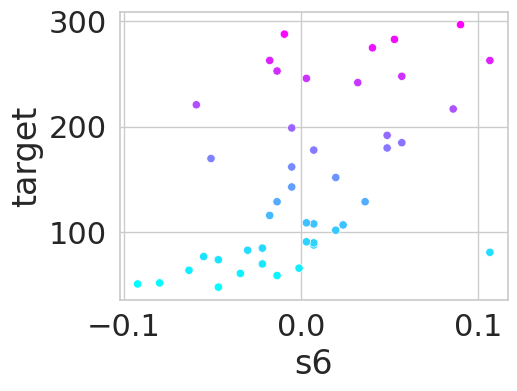

In [35]:
for feature in diabetes.feature_names:
    plt.figure(figsize=(5, 3.75))  # Adjusted size, smaller than the original (8, 6)
    sns.scatterplot(data=sample_df, x=feature, y='target', hue='target', palette='cool', legend=False)

In [36]:
#  Split the dataset
x_train, x_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, random_state=11)
print(x_train.shape)
print(x_test.shape)

(331, 10)
(111, 10)


In [37]:
#  Linear regression model
linear_regression = LinearRegression()
linear_regression.fit(X=x_train, y=y_train)

LinearRegression()

In [38]:
#  Print coefficients
for i, name in enumerate(diabetes.feature_names):
    print(f'{name:>15}: {linear_regression.coef_[i]}')

            age: -60.21981405677291
            sex: -266.45705232203574
            bmi: 523.0634112596993
             bp: 310.5134699670048
             s1: -336.1614738106944
             s2: 137.3392923842451
             s3: -131.13923283453653
             s4: -1.1492348017315557
             s5: 622.3286855688128
             s6: 60.466457691682535


In [39]:
#  Print intercept
print(linear_regression.intercept_)

152.22822762230342


In [40]:
#  Predict and compare
predicted = linear_regression.predict(x_test)
expected = y_test

print(predicted[:5])
print(expected[:5])

[115.46474836  83.4585369  160.77727376 187.65710274  72.72122197]
[ 79.  55. 109. 178.  39.]


In [41]:
#  Create a dataframe for predicted and expected values
df = pd.DataFrame({
    'Expected': expected,
    'Predicted': predicted
})

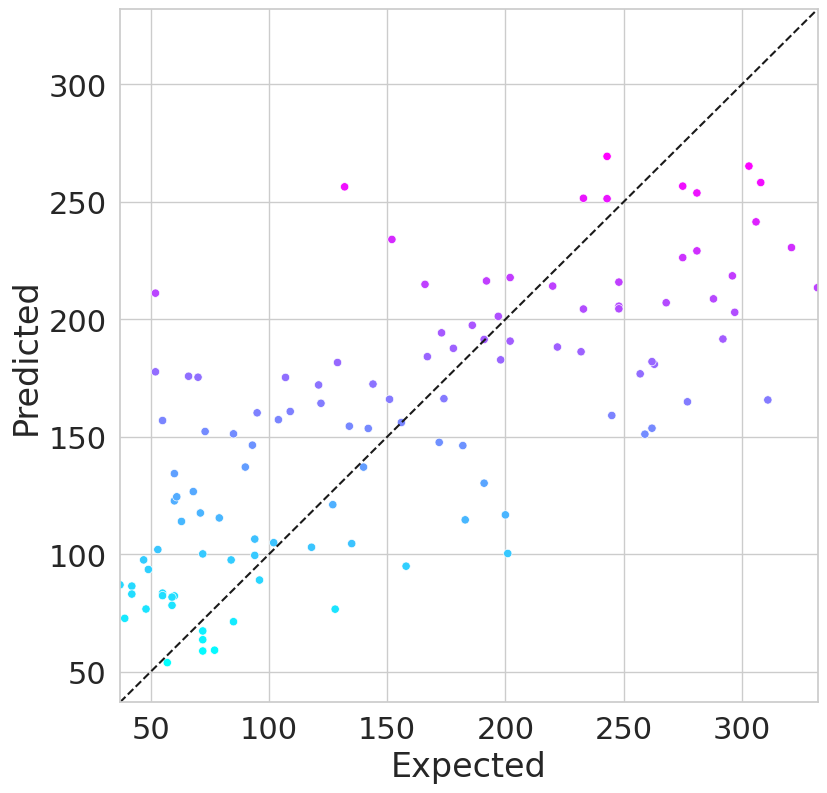

In [42]:
#  Plot predictions vs expectations
figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)

start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)
line = plt.plot([start, end], [start, end], 'k--')

In [43]:
# Calculate and print metrics
print(metrics.r2_score(expected, predicted))
print(metrics.mean_squared_error(expected, predicted))

0.5322429620529407
3458.2307025173577


In [44]:
#  Train and evaluate multiple regression models using cross-validation
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

In [45]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
                             X=diabetes.data,
                             y=diabetes.target,
                             scoring='r2',
                             cv=kfold)
    print(f'{estimator_name:>16}: ' +
          f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.475
      ElasticNet: mean of r2 scores=-0.002
           Lasso: mean of r2 scores=0.339
           Ridge: mean of r2 scores=0.421
